In [131]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import LSTM, Dense
from keras.models import Sequential
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.layers.convolutional import Conv1D
from sklearn.utils import shuffle
from tensorflow import keras
from tensorflow.keras.layers import Bidirectional
import tensorflow as tf
from tensorflow.keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.layers import TimeDistributed
from keras.models import Model
from keras import regularizers
from keras.layers  import  LSTM
from keras.optimizers import Adam
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector
from keras.models import Model
import tensorflow as tf
import math, sys, time
import datetime
from tensorflow.keras.callbacks import ModelCheckpoint

from keras.layers import Input, Dropout, Dense, LSTM, TimeDistributed, RepeatVector
from keras.models import Model
from keras import regularizers
# Multiple Inputs
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, RepeatVector, TimeDistributed
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GRU
from tensorflow.keras.layers import MaxPooling1D
from tensorflow.keras.layers import RepeatVector
from tensorflow.keras.layers import TimeDistributed
#from tensorflow.keras.layers.convolutional import Conv2D
from tensorflow.keras.layers import Conv1D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import concatenate
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.models import load_model
import math, sys, time
# Use scikit-learn to grid search the batch size and epochs
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import load_model
from tensorflow.keras.layers import GRU, TimeDistributed, LSTM
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Flatten, Dropout, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

from pandas._testing import assert_frame_equal
from pandas.testing import assert_index_equal
import warnings
warnings.filterwarnings('ignore')

In [132]:
from EEGP import EEGPreprocessor
from neuralstart_filter import EEGFilter
import pandas as pd
import numpy as np
import os
from sklearn.utils import resample
from scipy.signal import butter, filtfilt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pywt
import time
from encoder_neuralstart import LabelEncoderModel
from scaler_neuralstar import ScalerHandler
from Neuralstart_process2 import EEGDataPreprocessor1
from Neuralstart_process3 import EEGDataPreprocessor2
#from neuralstart_dual_simultané_thread import DualDataPreprocessor
from neuralstart_ica_process import EEGDataPreprocessor_ica
#from neuralstart_duel_process_ica import DualDataPreprocessor_ica
from neuralstar_pca_process import PCAHandler
from encoder_neuralstart import LabelEncoderModel
from scaler_neuralstar import ScalerHandler
from neural_start_sqrt import ecg_wavelet
from hajj_neuralstart import HajjProcessor
#from neuralstart_process_production2 import EEGPreprocessor2_prod

In [133]:
def merge_dataframes_from_folder(folder_path):
    """
    Combine tous les fichiers .csv dans un dossier donné en une seule DataFrame pandas.
    """
    dataframes = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.csv'):
            filepath = os.path.join(folder_path, filename)
            df = pd.read_csv(filepath)
            dataframes.append(df)
    merged_df = pd.concat(dataframes)
    merged_df = merged_df.reset_index(drop=True)
    print("merge df is done.")
    return merged_df

In [134]:
df = merge_dataframes_from_folder('/Users/chajjar/Documents/DataAnalyse/C')

merge df is done.


In [135]:
def plot_data(df):
    columns = ['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'index', 'Direction', 'think_EEG 1',
       'ICA_component_EEG 1_1_x', 'think_EEG 2', 'ICA_component_EEG 2_1_x',
       'think_EEG 3', 'ICA_component_EEG 3_1_x', 'think_EEG 4',
       'ICA_component_EEG 4_1_x', 'think_EEG 5', 'ICA_component_EEG 5_1_x',
       'think_EEG 6', 'ICA_component_EEG 6_1_x', 'think_EEG 7',
       'ICA_component_EEG 7_1_x', 'think_EEG 8', 'ICA_component_EEG 8_1_x',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1_x',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1_x',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1_x',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1_x',
       'think_Gyroscope Y', 'ICA_component_Gyroscope Y_1_x',
       'think_Gyroscope Z', 'ICA_component_Gyroscope Z_1_x',
       'ICA_component_EEG 1_1_y', 'ICA_component_EEG 2_1_y',
       'ICA_component_EEG 3_1_y', 'ICA_component_EEG 4_1_y',
       'ICA_component_EEG 5_1_y', 'ICA_component_EEG 6_1_y',
       'ICA_component_EEG 7_1_y', 'ICA_component_EEG 8_1_y',
       'ICA_component_Accelerometer X_1_y',
       'ICA_component_Accelerometer Y_1_y',
       'ICA_component_Accelerometer Z_1_y', 'ICA_component_Gyroscope X_1_y',
       'ICA_component_Gyroscope Y_1_y', 'ICA_component_Gyroscope Z_1_y']
    plt.figure(figsize=(20, 15))
    for i, column in enumerate(columns):
        plt.subplot(len(columns), 1, i+1)
        plt.plot(df[column])
        plt.title(column, y=0, loc='right')
    plt.tight_layout()
    plt.show()

In [136]:
df2 = df.iloc[:590]

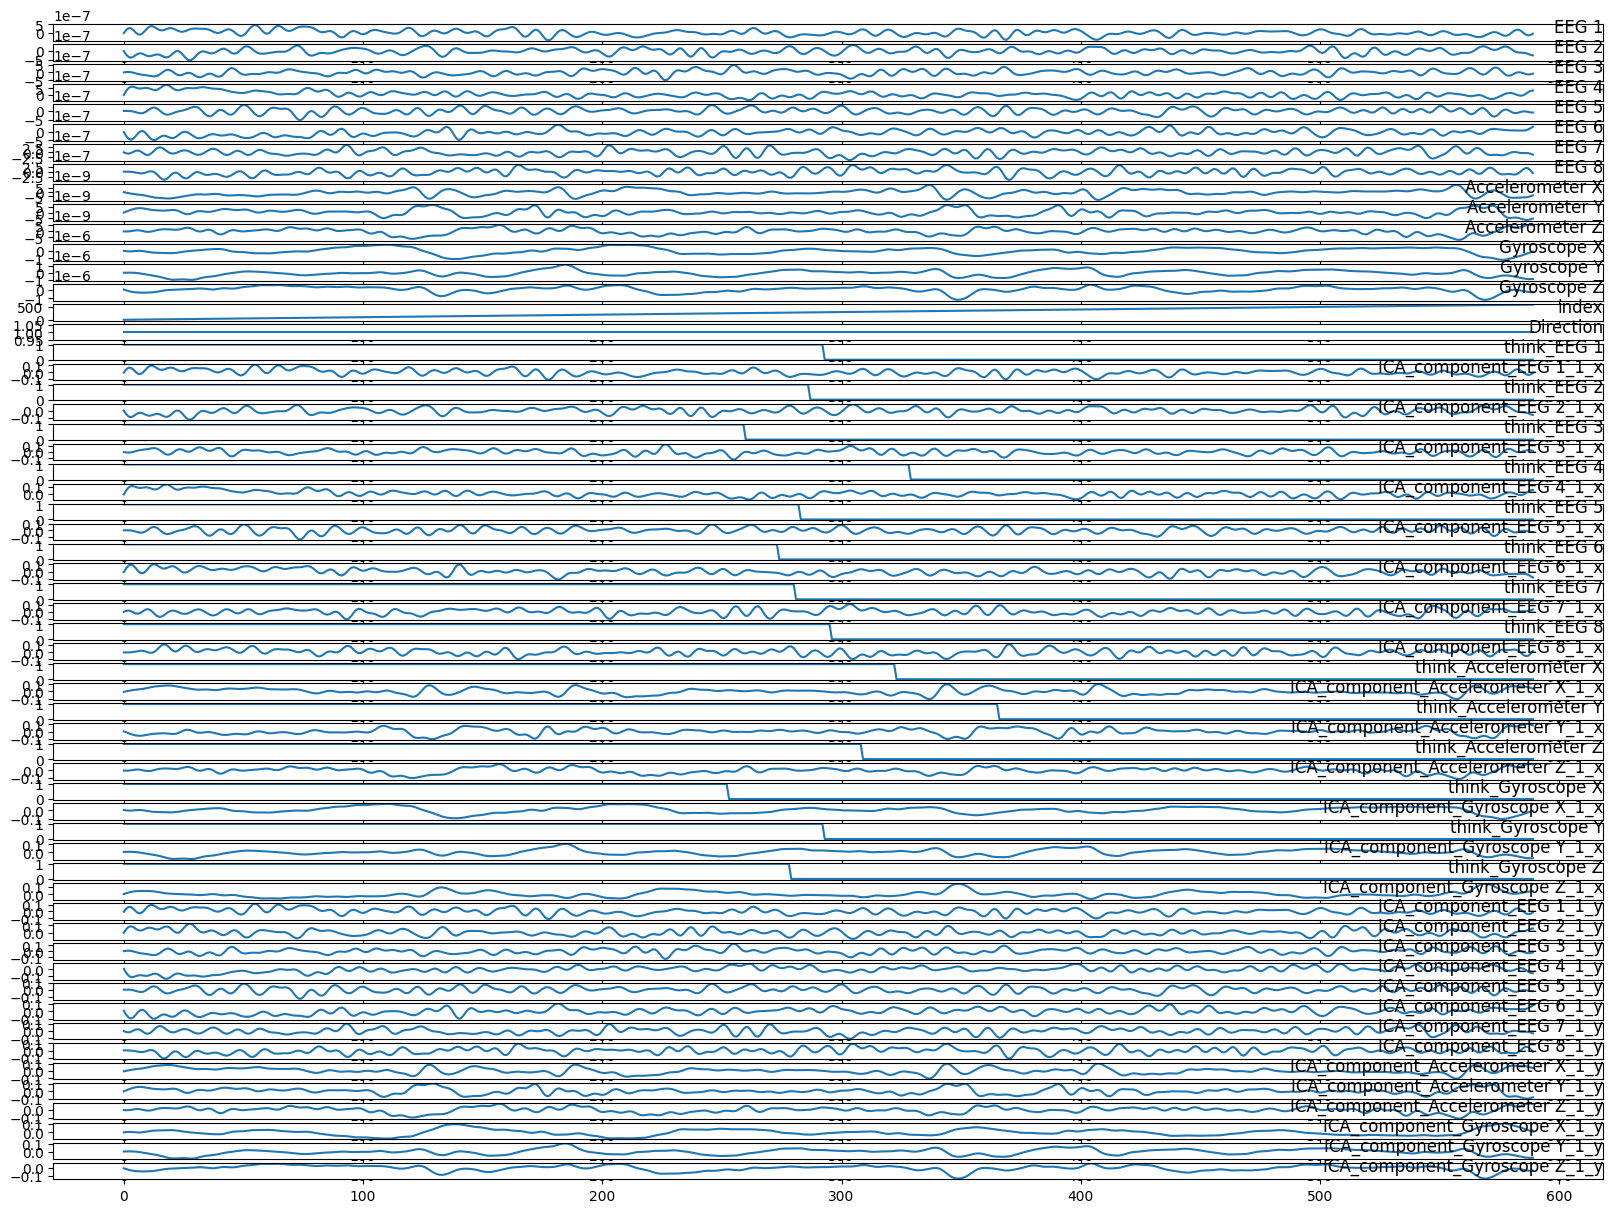

In [137]:
plot_data(df2)

In [138]:
df2.columns

Index(['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'index', 'Direction', 'think_EEG 1',
       'ICA_component_EEG 1_1_x', 'think_EEG 2', 'ICA_component_EEG 2_1_x',
       'think_EEG 3', 'ICA_component_EEG 3_1_x', 'think_EEG 4',
       'ICA_component_EEG 4_1_x', 'think_EEG 5', 'ICA_component_EEG 5_1_x',
       'think_EEG 6', 'ICA_component_EEG 6_1_x', 'think_EEG 7',
       'ICA_component_EEG 7_1_x', 'think_EEG 8', 'ICA_component_EEG 8_1_x',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1_x',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1_x',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1_x',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1_x',
       'think_Gyroscope Y', 'ICA_component_Gyroscope Y_1_x',
       'think_Gyroscope Z', 'ICA_component_Gyroscope Z_1_x',
       'ICA_component_

In [139]:
###### import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import joblib

# Séparez les colonnes que vous voulez normaliser et la colonne "Direction"
cols_to_normalize = [col for col in df.columns if col != 'Direction']
df_to_normalize = df[cols_to_normalize]
direction_col = df['Direction']

# Appliquer la normalisation
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df_to_normalize), columns=cols_to_normalize)

# Rejoignez les données normalisées avec la colonne "Direction"
df_normalized['Direction'] = direction_col

print(df_normalized)

# Enregistrez le scaler dans un fichier
scaler_file = 'scalerBD.joblib'
joblib.dump(scaler, scaler_file)

# Pour charger le scaler plus tard, utilisez la commande suivante :
# loaded_scaler = joblib.load(scaler_file)

# Pour utiliser le scaler chargé sur de nouvelles données :
# new_data_normalized = loaded_scaler.transform(new_data)

            EEG 1     EEG 2     EEG 3     EEG 4     EEG 5     EEG 6     EEG 7  \
0        0.520252  0.477111  0.473696  0.531163  0.467921  0.535966  0.451669   
1        0.637600  0.331818  0.487685  0.704830  0.470301  0.387394  0.418478   
2        0.706310  0.233487  0.492541  0.832919  0.469731  0.282276  0.408140   
3        0.701154  0.207286  0.483404  0.891432  0.462773  0.248983  0.429095   
4        0.632286  0.245684  0.461631  0.887448  0.446480  0.291011  0.469880   
...           ...       ...       ...       ...       ...       ...       ...   
1970095  0.464252  0.466820  0.085164  0.775833  0.461805  0.598911  0.455986   
1970096  0.440470  0.536887  0.152027  0.714747  0.476995  0.554659  0.472182   
1970097  0.437532  0.565797  0.248345  0.647991  0.486443  0.525949  0.477942   
1970098  0.467107  0.540302  0.358808  0.586378  0.482468  0.521972  0.469646   
1970099  0.520252  0.477111  0.473696  0.531163  0.467921  0.535966  0.451669   

            EEG 8  Accelero

['scalerBD.joblib']

In [198]:
df_normalized2 = df_normalized

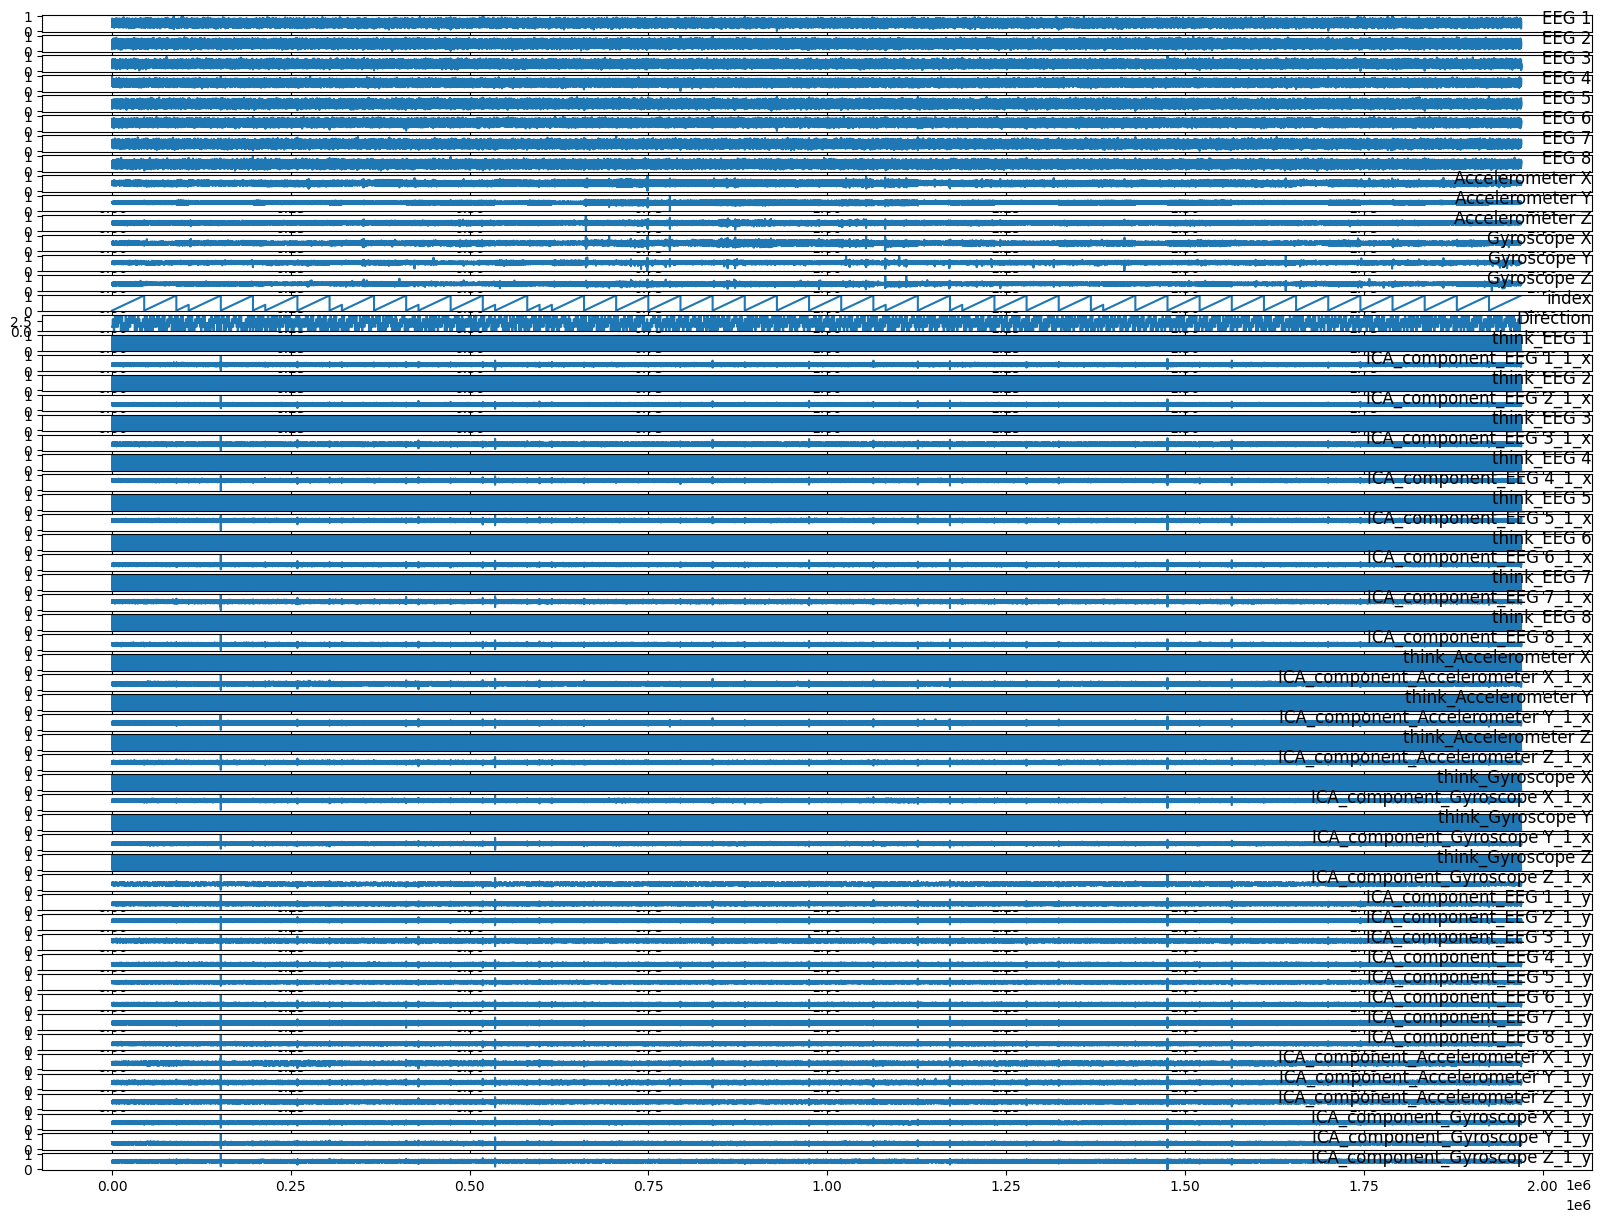

In [199]:
plot_data(df_normalized2)

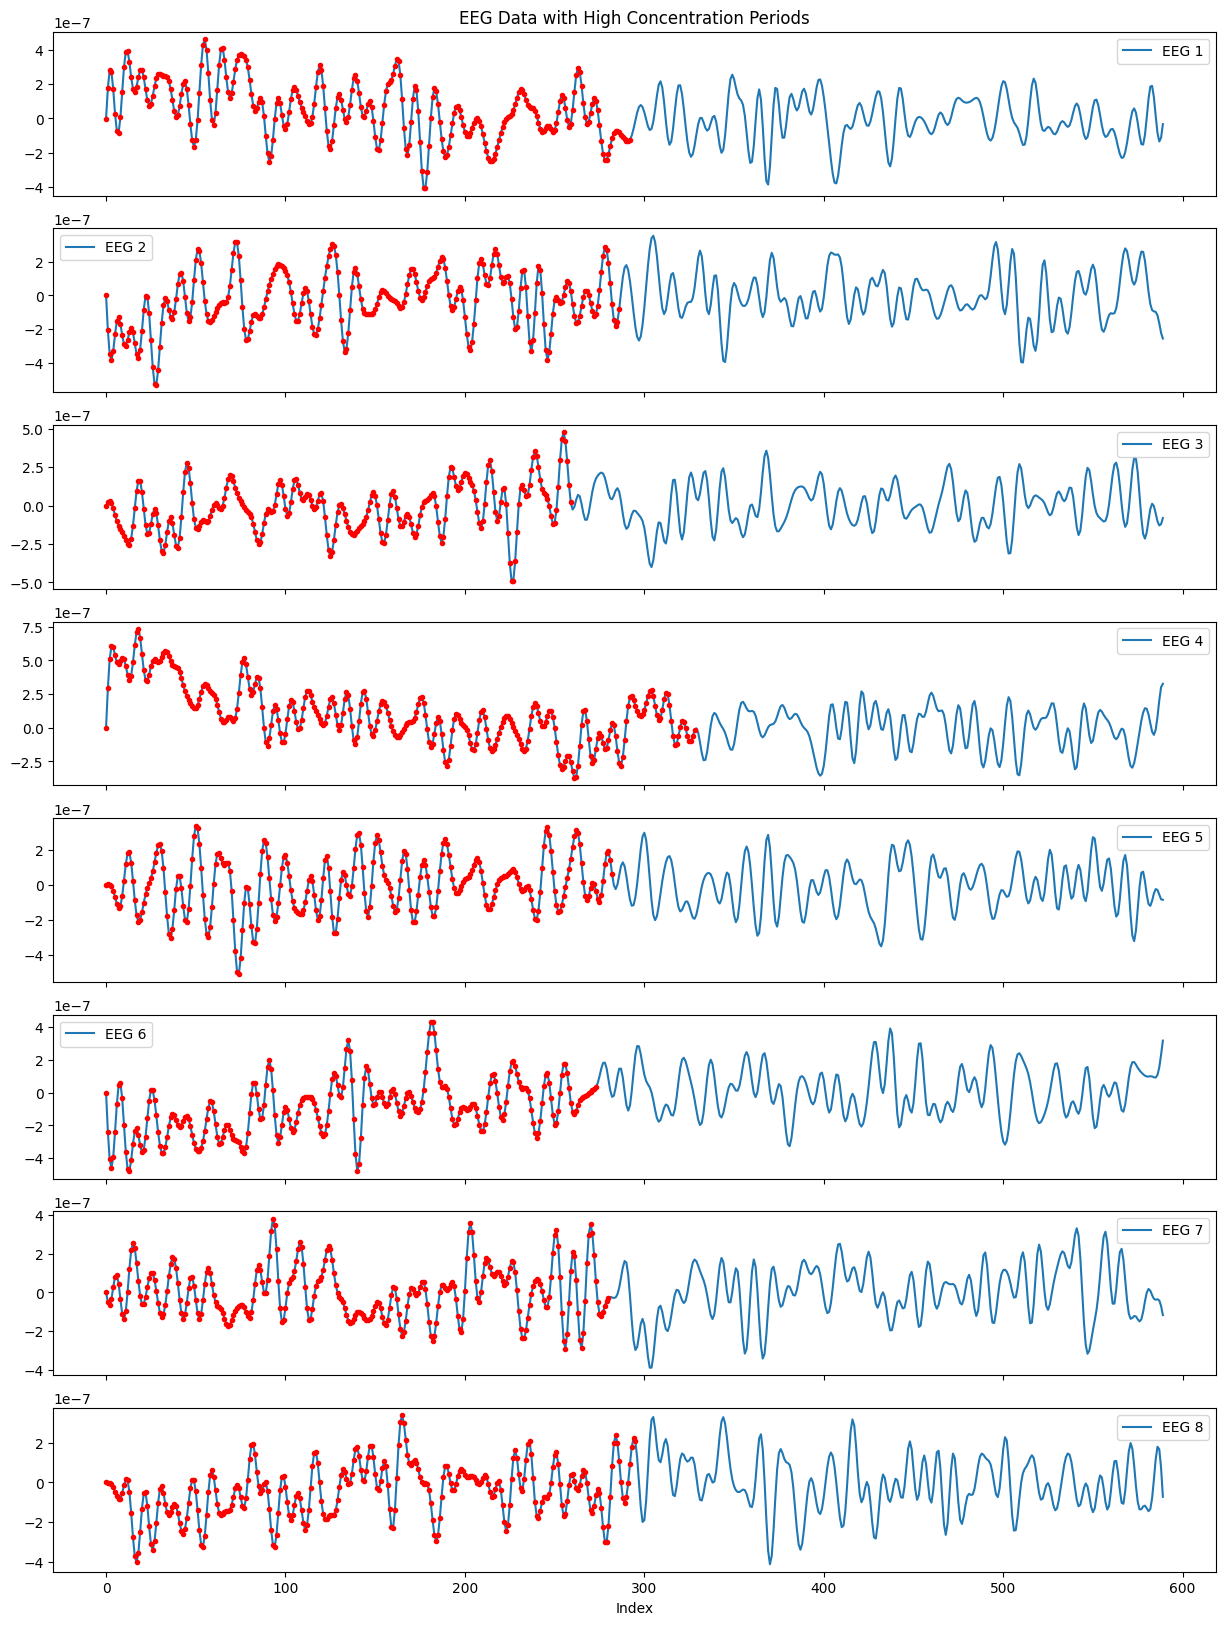

In [200]:
import matplotlib.pyplot as plt

df = df2

# Créez une figure et un ensemble de sous-tracés pour les données EEG
fig, axes = plt.subplots(nrows=8, ncols=1, figsize=(15, 20), sharex=True)
for i in range(1, 9):
    channel_name = f"EEG {i}"
    think_channel_name = f"think_{channel_name}"
    
    # Tracez les données EEG
    axes[i-1].plot(df.index, df[channel_name], label=channel_name)
    
    # Tracez les cibles en rouge
    targets = df.index[df[think_channel_name] == 1]
    axes[i-1].plot(targets, df.loc[targets, channel_name], "ro", markersize=3)
    
    # Ajoutez une légende
    axes[i-1].legend()

# Configurez les étiquettes et titres des axes
axes[-1].set_xlabel('Index')
axes[0].set_title('EEG Data with High Concentration Periods')

# Affichez la figure
plt.show()

In [201]:
df2.columns

Index(['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'index', 'Direction', 'think_EEG 1',
       'ICA_component_EEG 1_1_x', 'think_EEG 2', 'ICA_component_EEG 2_1_x',
       'think_EEG 3', 'ICA_component_EEG 3_1_x', 'think_EEG 4',
       'ICA_component_EEG 4_1_x', 'think_EEG 5', 'ICA_component_EEG 5_1_x',
       'think_EEG 6', 'ICA_component_EEG 6_1_x', 'think_EEG 7',
       'ICA_component_EEG 7_1_x', 'think_EEG 8', 'ICA_component_EEG 8_1_x',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1_x',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1_x',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1_x',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1_x',
       'think_Gyroscope Y', 'ICA_component_Gyroscope Y_1_x',
       'think_Gyroscope Z', 'ICA_component_Gyroscope Z_1_x',
       'ICA_component_

In [202]:
df_normalized2

,EEG 1,EEG 2,EEG 3,EEG 4,EEG 5,EEG 6,EEG 7,EEG 8,Accelerometer X,Accelerometer Y,...,ICA_component_EEG 6_1_y,ICA_component_EEG 7_1_y,ICA_component_EEG 8_1_y,ICA_component_Accelerometer X_1_y,ICA_component_Accelerometer Y_1_y,ICA_component_Accelerometer Z_1_y,ICA_component_Gyroscope X_1_y,ICA_component_Gyroscope Y_1_y,ICA_component_Gyroscope Z_1_y,Direction
0,0.520252,0.477111,0.473696,0.531163,0.467921,0.535966,0.451669,0.437868,0.503797,0.539839,...,0.351877,0.434542,0.381680,0.402787,0.458646,0.496168,0.439916,0.407059,0.528681,1
1,0.637600,0.331818,0.487685,0.704830,0.470301,0.387394,0.418478,0.437431,0.494977,0.546311,...,0.305321,0.422196,0.381527,0.409254,0.471689,0.495005,0.443023,0.407723,0.521787,1
2,0.706310,0.233487,0.492541,0.832919,0.469731,0.282276,0.408140,0.435773,0.486445,0.552522,...,0.272382,0.418351,0.380945,0.415510,0.484207,0.495812,0.444882,0.408119,0.515466,1
3,0.701154,0.207286,0.483404,0.891432,0.462773,0.248983,0.429095,0.431120,0.478633,0.558198,...,0.261950,0.426146,0.379313,0.421238,0.495645,0.499232,0.444848,0.407987,0.510187,1
4,0.632286,0.245684,0.461631,0.887448,0.446480,0.291011,0.469880,0.421726,0.471992,0.563023,...,0.275119,0.441316,0.376018,0.426107,0.505370,0.504071,0.443189,0.407097,0.506234,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1970095,0.464252,0.466820,0.085164,0.775833,0.461805,0.598911,0.455986,0.568826,0.493640,0.507521,...,0.379984,0.426813,0.440995,0.385921,0.355816,0.481809,0.461425,0.448111,0.538756,2
1970096,0.440470,0.536887,0.152027,0.714747,0.476995,0.554659,0.472182,0.541333,0.482004,0.510686,...,0.352378,0.435850,0.426223,0.367094,0.367815,0.489917,0.460007,0.441136,0.533775,2
1970097,0.437532,0.565797,0.248345,0.647991,0.486443,0.525949,0.477942,0.507021,0.479698,0.517722,...,0.334468,0.439064,0.407787,0.363363,0.394492,0.495066,0.457136,0.431980,0.531215,2
1970098,0.467107,0.540302,0.358808,0.586378,0.482468,0.521972,0.469646,0.471890,0.488184,0.527903,...,0.331987,0.434435,0.388911,0.377093,0.433095,0.494162,0.453022,0.421030,0.532276,2


In [203]:
df3 = df_normalized2[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'think_EEG 1',
       'ICA_component_EEG 1_1_x', 'think_EEG 2', 'ICA_component_EEG 2_1_x',
       'think_EEG 3', 'ICA_component_EEG 3_1_x', 'think_EEG 4',
       'ICA_component_EEG 4_1_x', 'think_EEG 5', 'ICA_component_EEG 5_1_x',
       'think_EEG 6', 'ICA_component_EEG 6_1_x', 'think_EEG 7',
       'ICA_component_EEG 7_1_x', 'think_EEG 8', 'ICA_component_EEG 8_1_x',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1_x',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1_x',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1_x',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1_x',
       'think_Gyroscope Y', 'ICA_component_Gyroscope Y_1_x',
       'think_Gyroscope Z', 'ICA_component_Gyroscope Z_1_x',
       'ICA_component_EEG 1_1_y', 'ICA_component_EEG 2_1_y',
       'ICA_component_EEG 3_1_y', 'ICA_component_EEG 4_1_y',
       'ICA_component_EEG 5_1_y', 'ICA_component_EEG 6_1_y',
       'ICA_component_EEG 7_1_y', 'ICA_component_EEG 8_1_y',
       'ICA_component_Accelerometer X_1_y',
       'ICA_component_Accelerometer Y_1_y',
       'ICA_component_Accelerometer Z_1_y', 'ICA_component_Gyroscope X_1_y',
       'ICA_component_Gyroscope Y_1_y', 'ICA_component_Gyroscope Z_1_y']]

In [204]:
import mne
# Créer un objet MNE Raw à partir du DataFrame
info = mne.create_info(ch_names=list(df3.columns), sfreq=250, ch_types='eeg')
raw = mne.io.RawArray(df3.T.to_numpy() * 1e-6, info)

Creating RawArray with float64 data, n_channels=56, n_times=1970100
    Range : 0 ... 1970099 =      0.000 ...  7880.396 secs
Ready.


In [205]:
# Convertir la colonne Direction en un tableau numpy
directions = df_normalized2['Direction'].to_numpy()

# Trouver les indices où la direction change
event_indices = np.where(np.diff(directions) != 0)[0] + 1

# Créer un tableau d'événements avec les indices et les directions correspondantes
events = np.column_stack((event_indices, np.zeros_like(event_indices), directions[event_indices]))

# Définir les paramètres
tmin, tmax = -0., 1
unique_directions = df_normalized2['Direction'].unique()
event_id = {str(dir): dir for dir in unique_directions}  # Créer un event_id basé sur les directions uniques

# Sélectionner les canaux d'intérêt (dans cet exemple, nous utilisons uniquement les canaux EEG)
picks = mne.pick_types(raw.info, meg=False, eeg=True, stim=False, eog=False, exclude='bads')

# Lire les époques
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False, picks=picks, baseline=None, preload=True, verbose=False)

print("Number of epochs:", len(epochs))
print("Epochs event_id:", epochs.event_id)

Number of epochs: 2656
Epochs event_id: {'1': 1, '3': 3, '2': 2, '0': 0, '4': 4}


In [206]:
print("First 5 events:")
for i in range(5):
    print(f"Sample: {events[i, 0]}, Time: {raw.times[events[i, 0]]}, Event: {events[i, 2]}")

print("\nLast 5 events:")
for i in range(-5, 0):
    print(f"Sample: {events[i, 0]}, Time: {raw.times[events[i, 0]]}, Event: {events[i, 2]}")

print("\nRaw time range:")
print(f"Start: {raw.times[0]}, End: {raw.times[-1]}")

First 5 events:
Sample: 745, Time: 2.98, Event: 3
Sample: 1496, Time: 5.984, Event: 2
Sample: 2247, Time: 8.988, Event: 0
Sample: 2999, Time: 11.996, Event: 3
Sample: 3751, Time: 15.004, Event: 4

Last 5 events:
Sample: 1966822, Time: 7867.288, Event: 2
Sample: 1967572, Time: 7870.288, Event: 0
Sample: 1968323, Time: 7873.292, Event: 3
Sample: 1969076, Time: 7876.304, Event: 4
Sample: 1969826, Time: 7879.304, Event: 2

Raw time range:
Start: 0.0, End: 7880.396


In [208]:
print("Length of DataFrame:", len(df3))
print("Length of Raw object:", len(raw))

Length of DataFrame: 1970100
Length of Raw object: 1970100


In [209]:
# Convertir la colonne Direction en un tableau numpy
directions = df_normalized2['Direction'].to_numpy()

# Trouver les indices où la direction change
event_indices = np.where(np.diff(directions) != 0)[0] + 1

# Créer un tableau d'événements avec les indices et les directions correspondantes
events = np.column_stack((event_indices, np.zeros_like(event_indices), directions[event_indices]))

print("First 10 events:")
print(events[:10])

print("Last 10 events:")
print(events[-10:])

First 10 events:
[[ 745    0    3]
 [1496    0    2]
 [2247    0    0]
 [2999    0    3]
 [3751    0    4]
 [4502    0    2]
 [5248    0    1]
 [6005    0    4]
 [6754    0    2]
 [7502    0    1]]
Last 10 events:
[[1963066       0       1]
 [1963816       0       2]
 [1964568       0       0]
 [1965319       0       1]
 [1966067       0       3]
 [1966822       0       2]
 [1967572       0       0]
 [1968323       0       3]
 [1969076       0       4]
 [1969826       0       2]]


In [211]:
# Lire les époques
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=False, picks=picks, baseline=None, preload=True, verbose=False)

print("Number of epochs:", len(epochs))
print("Epochs event_id:", epochs.event_id)

# Obtenir les labels des époques
labels = epochs.events
print(labels)

Number of epochs: 2656
Epochs event_id: {'1': 1, '3': 3, '2': 2, '0': 0, '4': 4}
[[    745       0       3]
 [   1496       0       2]
 [   2247       0       0]
 ...
 [1968323       0       3]
 [1969076       0       4]
 [1969826       0       2]]


In [212]:
# extract raw data. scale by 1000 due to scaling sensitivity in deep learning
X = epochs.get_data()*1000 # format is in (trials, channels, samples)
y = labels
print(y)

[[    745       0       3]
 [   1496       0       2]
 [   2247       0       0]
 ...
 [1968323       0       3]
 [1969076       0       4]
 [1969826       0       2]]


In [ ]:
chans = len(epochs.ch_names)

In [213]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Activation, Permute, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import SeparableConv2D, DepthwiseConv2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import SpatialDropout2D
from tensorflow.keras.regularizers import l1_l2
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.constraints import max_norm
from tensorflow.keras import backend as K

In [228]:
def DeepConvNet(nb_classes, Chans = 64, Samples = 256,
                dropoutRate = 0.5):
    """ Keras implementation of the Deep Convolutional Network as described in
    Schirrmeister et. al. (2017), Human Brain Mapping.
    
    This implementation assumes the input is a 2-second EEG signal sampled at 
    128Hz, as opposed to signals sampled at 250Hz as described in the original
    paper. We also perform temporal convolutions of length (1, 5) as opposed
    to (1, 10) due to this sampling rate difference. 
    
    Note that we use the max_norm constraint on all convolutional layers, as 
    well as the classification layer. We also change the defaults for the
    BatchNormalization layer. We used this based on a personal communication 
    with the original authors.
    
                      ours        original paper
    pool_size        1, 2        1, 3
    strides          1, 2        1, 3
    conv filters     1, 5        1, 10
    
    Note that this implementation has not been verified by the original 
    authors. 
    
    """

    # start the model
    input_main   = Input((Chans, Samples, 1))
    block1       = Conv2D(25, (1, 5), 
                                 input_shape=(Chans, Samples, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(input_main)
    block1       = Conv2D(25, (Chans, 1),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block1       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block1)
    block1       = Activation('elu')(block1)
    block1       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block1)
    block1       = Dropout(dropoutRate)(block1)
  
    block2       = Conv2D(50, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block1)
    block2       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block2)
    block2       = Activation('elu')(block2)
    block2       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block2)
    block2       = Dropout(dropoutRate)(block2)
    
    block3       = Conv2D(100, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block2)
    block3       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block3)
    block3       = Activation('elu')(block3)
    block3       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block3)
    block3       = Dropout(dropoutRate)(block3)
    
    block4       = Conv2D(200, (1, 5),
                                 kernel_constraint = max_norm(2., axis=(0,1,2)))(block3)
    block4       = BatchNormalization(epsilon=1e-05, momentum=0.9)(block4)
    block4       = Activation('elu')(block4)
    block4       = MaxPooling2D(pool_size=(1, 2), strides=(1, 2))(block4)
    block4       = Dropout(dropoutRate)(block4)
    
    flatten      = Flatten()(block4)
    
    dense        = Dense(nb_classes, kernel_constraint = max_norm(0.5))(flatten)
    softmax      = Activation('softmax')(dense)
    
    return Model(inputs=input_main, outputs=softmax)


# need these for ShallowConvNet
def square(x):
    return K.square(x)

def log(x):
    return K.log(K.clip(x, min_value = 1e-7, max_value = 10000))   


In [229]:
from mne import io
from mne.datasets import sample


from tensorflow.keras import utils as np_utils



import numpy as np
from tensorflow.keras.utils import to_categorical

import numpy as np
from tensorflow.keras.utils import to_categorical
chans = len(epochs.ch_names)
print(chans)
samples = epochs.get_data().shape[2]
print(samples)
kernels = 1
# Assuming `epochs` is the variable containing the loaded epochs
# Get the data and labels from the epochs
X = epochs.get_data()
y = epochs.events[:, 2]

# Define the proportions for train, validate, and test sets
train_ratio = 0.5
validate_ratio = 0.25
test_ratio = 0.25

# Calculate the indices for splitting the data
total_epochs = len(epochs)
train_index = int(train_ratio * total_epochs)
validate_index = train_index + int(validate_ratio * total_epochs)

# Split the data and labels into train, validate, and test sets
X_train = X[:train_index]
y_train = y[:train_index]
X_validate = X[train_index:validate_index]
y_validate = y[train_index:validate_index]
X_test = X[validate_index:]
y_test = y[validate_index:]

# Convert labels to one-hot encodings
y_train = to_categorical(y_train - 1)
y_validate = to_categorical(y_validate - 1)
y_test = to_categorical(y_test - 1)

# Reshape the data to be in the format (trials, channels, samples, kernels)
X_train = X_train.reshape(X_train.shape[0], chans, samples, kernels)
X_validate = X_validate.reshape(X_validate.shape[0], chans, samples, kernels)
X_test = X_test.reshape(X_test.shape[0], chans, samples, kernels)

print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

56
251
X_train shape: (1328, 56, 251, 1)
1328 train samples
664 test samples


In [ ]:
# Import additional required modules
from tensorflow.keras.callbacks import ModelCheckpoint

# Create an instance of the DeepConvNet model
deepconvnet_model = DeepConvNet(nb_classes=4, Chans=chans, Samples=samples, dropoutRate=0.5)

# Compile the model and set the optimizers
deepconvnet_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Count the number of parameters in the model
numParams = deepconvnet_model.count_params()

# Set a valid path for your system to record model checkpoints
checkpointer = ModelCheckpoint(filepath='/Users/chajjar/Documents/DataAnalyse/checkpoint_deepconvnet.h5', verbose=1, save_best_only=True)

# The syntax is {class_1:weight_1, class_2:weight_2,...}.
#class_weights = {0: 1, 1: 1, 2: 1, 3: 1, 4: 1}

# Fit the model
fitted_deepconvnet_model = deepconvnet_model.fit(X_train, y_train, batch_size=16, epochs=300,
                                                 verbose=2, validation_data=(X_validate, y_validate),
                                                 callbacks=[checkpointer])

Epoch 1/300

Epoch 1: val_loss improved from inf to 1.46855, saving model to /Users/chajjar/Documents/DataAnalyse/checkpoint_deepconvnet.h5
83/83 - 8s - loss: 1.5383 - accuracy: 0.2922 - val_loss: 1.4685 - val_accuracy: 0.2666 - 8s/epoch - 94ms/step
Epoch 2/300

Epoch 2: val_loss did not improve from 1.46855
83/83 - 5s - loss: 1.5720 - accuracy: 0.3050 - val_loss: 3.9173 - val_accuracy: 0.2666 - 5s/epoch - 62ms/step
Epoch 3/300

Epoch 3: val_loss did not improve from 1.46855
83/83 - 5s - loss: 1.5722 - accuracy: 0.3027 - val_loss: 6.5541 - val_accuracy: 0.3614 - 5s/epoch - 57ms/step
Epoch 4/300

Epoch 4: val_loss did not improve from 1.46855
83/83 - 5s - loss: 1.5930 - accuracy: 0.2997 - val_loss: 4.9101 - val_accuracy: 0.2666 - 5s/epoch - 64ms/step
Epoch 5/300

Epoch 5: val_loss did not improve from 1.46855
83/83 - 5s - loss: 1.5719 - accuracy: 0.2764 - val_loss: 10.0439 - val_accuracy: 0.3614 - 5s/epoch - 60ms/step
Epoch 6/300

Epoch 6: val_loss did not improve from 1.46855
83/83 - 6

In [16]:
from typing import List, Union
def split_variadic_sequences(
	data: pd.DataFrame, sequence_column: str, boundaries_column: str = None, *,
	begin_iter: int = 0, max_iter: int = -1, keep_index: bool = True, show_debug: bool = False, show_error: bool = True) \
		-> Union[List[pd.DataFrame], None]:

	"""
	Splits a pandas Dataframe into multiple segments,
	where sequence_column changes and keeps them in bounds of boundaries_column
	when set (There's some few extra paramaters, mostly used for debugging)

	PARAMETERS
	----------
	data: `DataFrame`
		Original dataframe to convert
	sequence_column: `str`
		Name of the column to determine where to split sequences
	boundaries_column: `str` | `None`
		Name of the column to determine the boundaries_column of sequences

	OPTIONS
	-------
	begin_iter: `int`
		Where to start in the original dataframe
	max_iter: `int`
		Where to stop in the original dataframe (-1 for all)
	keep_index: `bool`
		Whether or not it should keep the original index in the output
	show_debug: `bool`
		Whether or not it should print debugging messages
	show_error: `bool`
		Whether or not it should print error messages

	RETURN
	------
	Upon success,
		Returns a list of structured DataFrame (`list[pandas.DataFrame]`).
	Upon failure,
		Returns `NONE`. (May occurs when `data` argument is invalid or provided columns names does not exists)
	"""

	# ####################### #
	#   UTILITIES FUNCTIONS   #
	# ####################### #

	def error(msg: str) -> None:
		if show_error:
			print(f"\033[31m\n{msg}\033[0m")

	def debug(msg: str) -> None:
		if show_debug:
			print(f"\033[2m{msg}\033[0m")

	def display(index: int) -> None:
		if boundaries_column:
			debug(f"data[{index}] => {data.iloc[index][sequence_column]} & {data.iloc[index][boundaries_column]} | current_var = {current_var}")
		else:
			debug(f"data[{index}] => {data.iloc[index][sequence_column]}")

	def store(frame: pd.DataFrame) -> pd.DataFrame:
		if type(frame) == pd.DataFrame and len(frame) > 0:
			debug(f"Appending saved tempororary frame")
			output_frames.append(frame)
		return pd.DataFrame(columns=data.columns)

	# ###################### #
	#   CHECK FOR VALIDITY   #
	# ###################### #

	if type(data) != pd.DataFrame:
		return error(f"Given data structure is not a valid DataFrame!\nGiven: {type(data)}")
	if not sequence_column:
		return error("No sequence_column column were given! Impossible to split without it!")
	if not sequence_column in data.columns:
		return error(f"Given sequence_column column does not exists in the given DataFrame!\nGiven: {sequence_column}")
	if boundaries_column and not boundaries_column in data.columns:
		return error(f"Given boundaries_column column does not exists in the given DataFrame!\nGiven: {boundaries_column}")

	if max_iter < 0 or max_iter > len(data):
		max_iter = len(data)
	if begin_iter < 0:
		begin_iter = 0

	# ##################### #
	#   PREPARING STORAGE   #
	# ##################### #

	index: int = begin_iter
	gap_index: int = 0
	current_var = None
	allowed: list[int] = [0, 1]

	output_frames: list[pd.DataFrame] = []
	frame = pd.DataFrame(columns=data.columns)

	debug(f"Convertion begin!")
	while index < max_iter:

		# ##################### #
		#   GET BEGIN SECTION   #
		# ##################### #

		if boundaries_column:
			current_var = data.iloc[index][boundaries_column]
		while index < max_iter and data.iloc[index][sequence_column] == 0 \
			and (not boundaries_column or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			frame = pd.concat([frame, data.iloc[index].to_frame().T], ignore_index=not keep_index)
			index += 1
		frame = store(frame)

		# ###################### #
		#   GET MIDDLE SECTION   #
		# ###################### #

		gap_index = index
		while index < max_iter and (not boundaries_column \
			or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			if data.iloc[index][sequence_column] not in allowed:
				return error(f"It must contains only one the following: {allowed}.\nFound: {data.iloc[index][sequence_column]} at position {index}.")
			if data.iloc[index][sequence_column] == 1:
				index += 1
				while gap_index < index:
					frame = pd.concat([frame, data.iloc[gap_index].to_frame().T], ignore_index=not keep_index)
					gap_index += 1
			else:
				index += 1
		frame = store(frame)

		# ##################### #
		#   GET FINAL SECTION   #
		# ##################### #

		index = gap_index
		while index < max_iter and (not boundaries_column \
			or (boundaries_column and data.iloc[index][boundaries_column] == current_var)):
			display(index)
			frame = pd.concat([frame, data.iloc[index].to_frame().T], ignore_index=not keep_index)
			index += 1

	# #################### #
	#   FINALIZE OUTPUTS   #
	# #################### #

	frame = store(frame)
	debug(f"Convertion complete!")
	return output_frames

In [ ]:
out = split_variadic_sequences(df_normalized, "think_EEG 1", "Direction", keep_index=True)

In [88]:
def get_sequences_labels(dfs, maxlen=10):
    """
    get sequence label activity for model

    Parameters
    ----------
    dfs : list of pd.DataFrame
        List of Input DataFrames containing features for X.

    Returns
    -------
    X, y
    """
    X = []
    y = []
    
    for df in dfs:
        # Récupération de la séquence
        sequence = df[['EEG 1', 'EEG 2', 'EEG 3', 'EEG 4', 'EEG 5', 'EEG 6', 'EEG 7', 'EEG 8',
       'Accelerometer X', 'Accelerometer Y', 'Accelerometer Z', 'Gyroscope X',
       'Gyroscope Y', 'Gyroscope Z', 'think_EEG 1',
       'ICA_component_EEG 1_1_x', 'think_EEG 2', 'ICA_component_EEG 2_1_x',
       'think_EEG 3', 'ICA_component_EEG 3_1_x', 'think_EEG 4',
       'ICA_component_EEG 4_1_x', 'think_EEG 5', 'ICA_component_EEG 5_1_x',
       'think_EEG 6', 'ICA_component_EEG 6_1_x', 'think_EEG 7',
       'ICA_component_EEG 7_1_x', 'think_EEG 8', 'ICA_component_EEG 8_1_x',
       'think_Accelerometer X', 'ICA_component_Accelerometer X_1_x',
       'think_Accelerometer Y', 'ICA_component_Accelerometer Y_1_x',
       'think_Accelerometer Z', 'ICA_component_Accelerometer Z_1_x',
       'think_Gyroscope X', 'ICA_component_Gyroscope X_1_x',
       'think_Gyroscope Y', 'ICA_component_Gyroscope Y_1_x',
       'think_Gyroscope Z', 'ICA_component_Gyroscope Z_1_x',
       'ICA_component_EEG 1_1_y', 'ICA_component_EEG 2_1_y',
       'ICA_component_EEG 3_1_y', 'ICA_component_EEG 4_1_y',
       'ICA_component_EEG 5_1_y', 'ICA_component_EEG 6_1_y',
       'ICA_component_EEG 7_1_y', 'ICA_component_EEG 8_1_y',
       'ICA_component_Accelerometer X_1_y',
       'ICA_component_Accelerometer Y_1_y',
       'ICA_component_Accelerometer Z_1_y', 'ICA_component_Gyroscope X_1_y',
       'ICA_component_Gyroscope Y_1_y', 'ICA_component_Gyroscope Z_1_y']].values

        # Label
        if df["think_EEG 1"].sum() == 0:
            label = 5
        else:
            label = df["Direction"].iloc[0]

        # Pad sequence
        sequence = pad_sequences([sequence], maxlen=maxlen, dtype='float32', padding='post')[0]
        
        # Réarrangement de la forme de la séquence
        #sequence = sequence.reshape(sequence.shape[0], sequence.shape[1], 1)

        # Conversion en numpy arrays
        X.append(sequence)
        y.append(label)

    return np.array(X), np.array(y)

In [19]:
X ,y = get_sequences_labels(out, 256)

In [20]:
X.shape

(5314, 256, 56)

In [ ]:
y.shape

In [29]:
def _bytes_feature(value):
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

# Modifiez la fonction serialize_example pour utiliser _float_feature pour y
def serialize_example(x, y):
    feature = {
        'x': _bytes_feature(x.tostring()),
        'y': _float_feature(y)
    }
    example_proto = tf.train.Example(features=tf.train.Features(feature=feature))
    return example_proto.SerializeToString()


filename = 'neural_data.tfrecords'
with tf.io.TFRecordWriter(filename) as writer:
    for i in range(len(X)):
        example = serialize_example(X[i], y[i])
        writer.write(example)

print(f"Data saved to {filename}")

Data saved to neural_data.tfrecords


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [47]:
from ncps.wirings import AutoNCP
from ncps.tf import LTC
import tensorflow as tf
from ncps import wirings
import tensorflow as tf
from sklearn.utils.class_weight import compute_class_weight
from keras.callbacks import EarlyStopping, ModelCheckpoint
import kerasncp as kncp
from kerasncp.tf import LTCCell
#from ncps import LTC, AutoNCP

num_classes = 6  # Remplacez par le nombre de classes dans vos données
timesteps = 256
input_shape = (timesteps, X_train.shape[2])

#arch = kncp.wirings.Random(32, 1, sparsity_level=0.5)  # 32 units, 1 motor neuron
#rnn_cell = LTCCell(arch)

#wiring = kncp.wirings.NCP(
#    inter_neurons=80,  # Number of inter neurons
#    command_neurons=8,  # Number of command neurons
#    motor_neurons=14,  # Number of motor neurons
#    sensory_fanout=4,  # How many outgoing synapses has each sensory neuron
#    inter_fanout=4,  # How many outgoing synapses has each inter neuron
#    recurrent_command_synapses=4,  # Now many recurrent synapses are in the
#    # command neuron layer
#    motor_fanin=6,  # How many incomming syanpses has each motor neuron
#)
#fc_wiring = wirings.AutoNCP(80, 14)
wiring = kncp.wirings.FullyConnected(180)
rnn_cell = LTCCell(wiring)

model = keras.models.Sequential(
    [
        keras.layers.InputLayer(input_shape=input_shape),
        keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', padding='same'),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
        keras.layers.MaxPooling1D(pool_size=2),
        keras.layers.RNN(rnn_cell, return_sequences=True),
        keras.layers.GlobalAveragePooling1D(),
        keras.layers.Dense(num_classes, activation="softmax"),
    ]
)

model.compile(
    optimizer=keras.optimizers.Adam(0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
    #run_eagerly=True
)

model.summary()

# Définissez les callbacks
early_stopping = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

# Calculez les poids de classe avec la fonction compute_class_weight
class_weights = compute_class_weight(class_weight="balanced", classes=np.unique(y_train), y=y_train)
class_weights = {i: w for i, w in enumerate(class_weights)}

# Réduire le poids de la classe 2 (ajustez cette valeur en fonction de vos besoins)
#class_weights[5] *= 0.1

# Entraînez le modèle
history =model.fit(X_train, y_train_categorical, epochs=10, batch_size=30, validation_data=(X_test, y_test_categorical),shuffle=True,class_weight=class_weights,callbacks=[early_stopping, model_checkpoint])

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_15 (Conv1D)          (None, 256, 32)           5408      
                                                                 
 max_pooling1d_15 (MaxPoolin  (None, 128, 32)          0         
 g1D)                                                            
                                                                 
 conv1d_16 (Conv1D)          (None, 128, 64)           6208      
                                                                 
 max_pooling1d_16 (MaxPoolin  (None, 64, 64)           0         
 g1D)                                                            
                                                                 
 rnn_5 (RNN)                 (None, 64, 180)           176708    
                                                                 
 global_average_pooling1d_5   (None, 180)             

KeyboardInterrupt: 

In [48]:
from sklearn.datasets import make_classification
from sklearn.utils import compute_class_weight
from sklearn.utils.class_weight import compute_class_weight
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, LSTM, Bidirectional, Dropout

model = Sequential()
model.add(Conv1D(64, (6,), activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(MaxPooling1D(2))
model.add(Conv1D(28, (6,), activation='relu'))
model.add(MaxPooling1D(2))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(56, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(28, activation='relu'))
model.add(Dense(6, activation='softmax'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight = "balanced", classes= classes, y= y_train)
class_weights = {i: w for i, w in enumerate(class_weights)}
class_weights[5] *= 0.01
early_stopping = EarlyStopping(monitor='val_accuracy', patience=100, verbose=1, mode='max')
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', verbose=1, save_best_only=True)

In [49]:
history = model.fit(X_train, y_train, epochs=100, batch_size=100, validation_data=(X_test, y_test), shuffle=True, class_weight=class_weights,callbacks=[early_stopping, model_checkpoint])

Epoch 1/100
43/43 [==============================] - ETA: 0s - loss: 1.4360 - accuracy: 0.0976
Epoch 1: val_accuracy improved from -inf to 0.09784, saving model to best_model.h5
43/43 [==============================] - 20s 257ms/step - loss: 1.4360 - accuracy: 0.0976 - val_loss: 1.9735 - val_accuracy: 0.0978
Epoch 2/100
43/43 [==============================] - ETA: 0s - loss: 1.3850 - accuracy: 0.1000
Epoch 2: val_accuracy improved from 0.09784 to 0.13358, saving model to best_model.h5
43/43 [==============================] - 11s 247ms/step - loss: 1.3850 - accuracy: 0.1000 - val_loss: 1.7383 - val_accuracy: 0.1336
Epoch 3/100
43/43 [==============================] - ETA: 0s - loss: 1.3759 - accuracy: 0.1583
Epoch 3: val_accuracy improved from 0.13358 to 0.60960, saving model to best_model.h5
43/43 [==============================] - 11s 254ms/step - loss: 1.3759 - accuracy: 0.1583 - val_loss: 1.6721 - val_accuracy: 0.6096
Epoch 4/100
43/43 [==============================] - ETA: 0s - l

Epoch 30/100
43/43 [==============================] - ETA: 0s - loss: 1.3448 - accuracy: 0.5267
Epoch 30: val_accuracy did not improve from 0.65381
43/43 [==============================] - 11s 261ms/step - loss: 1.3448 - accuracy: 0.5267 - val_loss: 0.8938 - val_accuracy: 0.5908
Epoch 31/100
43/43 [==============================] - ETA: 0s - loss: 1.3449 - accuracy: 0.5425
Epoch 31: val_accuracy did not improve from 0.65381
43/43 [==============================] - 11s 260ms/step - loss: 1.3449 - accuracy: 0.5425 - val_loss: 0.8750 - val_accuracy: 0.5908
Epoch 32/100
43/43 [==============================] - ETA: 0s - loss: 1.3457 - accuracy: 0.5387
Epoch 32: val_accuracy did not improve from 0.65381
43/43 [==============================] - 11s 260ms/step - loss: 1.3457 - accuracy: 0.5387 - val_loss: 0.9353 - val_accuracy: 0.5898
Epoch 33/100
43/43 [==============================] - ETA: 0s - loss: 1.3467 - accuracy: 0.5295
Epoch 33: val_accuracy did not improve from 0.65381
43/43 [=====

43/43 [==============================] - ETA: 0s - loss: 1.3412 - accuracy: 0.5761
Epoch 59: val_accuracy did not improve from 0.65381
43/43 [==============================] - 12s 269ms/step - loss: 1.3412 - accuracy: 0.5761 - val_loss: 0.8027 - val_accuracy: 0.6491
Epoch 60/100
43/43 [==============================] - ETA: 0s - loss: 1.3417 - accuracy: 0.5780
Epoch 60: val_accuracy did not improve from 0.65381
43/43 [==============================] - 13s 292ms/step - loss: 1.3417 - accuracy: 0.5780 - val_loss: 0.8033 - val_accuracy: 0.6472
Epoch 61/100
43/43 [==============================] - ETA: 0s - loss: 1.3392 - accuracy: 0.5714
Epoch 61: val_accuracy did not improve from 0.65381
43/43 [==============================] - 12s 287ms/step - loss: 1.3392 - accuracy: 0.5714 - val_loss: 0.7990 - val_accuracy: 0.6002
Epoch 62/100
43/43 [==============================] - ETA: 0s - loss: 1.3430 - accuracy: 0.5697
Epoch 62: val_accuracy did not improve from 0.65381
43/43 [==================

43/43 [==============================] - ETA: 0s - loss: 1.3341 - accuracy: 0.5822
Epoch 88: val_accuracy did not improve from 0.65381
43/43 [==============================] - 12s 269ms/step - loss: 1.3341 - accuracy: 0.5822 - val_loss: 0.7949 - val_accuracy: 0.6510
Epoch 89/100
43/43 [==============================] - ETA: 0s - loss: 1.3354 - accuracy: 0.5867
Epoch 89: val_accuracy did not improve from 0.65381
43/43 [==============================] - 11s 266ms/step - loss: 1.3354 - accuracy: 0.5867 - val_loss: 0.7911 - val_accuracy: 0.5927
Epoch 90/100
43/43 [==============================] - ETA: 0s - loss: 1.3338 - accuracy: 0.5702
Epoch 90: val_accuracy did not improve from 0.65381
43/43 [==============================] - 12s 271ms/step - loss: 1.3338 - accuracy: 0.5702 - val_loss: 0.7880 - val_accuracy: 0.6049
Epoch 91/100
43/43 [==============================] - ETA: 0s - loss: 1.3327 - accuracy: 0.5867
Epoch 91: val_accuracy did not improve from 0.65381
43/43 [==================

In [ ]:
restored_model = tf.keras.models.load_model("best_model.h5")

In [ ]:
restored_model.evaluate(x=X_test, y=y_test_categorical)

In [ ]:
# Évaluez le modèle
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy}")

In [ ]:
predictions = model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

In [ ]:
predicted_classes